<h1>Logistic Regression using independent numerical variable </h1>

<h2>Settings Notebook</h2>

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import numpy as np 
from statsmodels.iolib.summary2 import summary_col
from skimage import io
import plotly.graph_objs as go
from scipy.stats import pearsonr

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
import warnings 

warnings.filterwarnings('ignore')

In [3]:
# axes.titlesize : 24
# axes.labelsize : 20
# lines.linewidth : 3
# lines.markersize : 10
# xtick.labelsize : 16
# ytick.labelsize : 16

In [4]:
def setup_matplot(titlesize=int(14),labelsize=int(12)):
    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = [10,8]
    plt.rcParams['figure.titlesize'] = titlesize
    plt.rcParams['figure.labelsize'] = labelsize
    return(plt)

plt = setup_matplot()

<h2>Enter of data</h2>

In [5]:
!pwd

/mnt/d/Projects/linearmodels/notebooks


In [6]:
path = "../database/diabetes.csv"

df = pd.read_csv(f"{path}")

df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.rename(columns={'Pregnancies':'preg', 
                   'Glucose':'glu', 
                   'BloodPressure':'bps', 
                   'SkinThickness':'skin', 
                   'Insulin':'ins',
                   'BMI':'bmi', 
                   'DiabetesPedigreeFunction':'dpf', 
                   'Age':'age', 
                   'Outcome':'label'}, inplace=True)

df.head(3)

,preg,glu,bps,skin,ins,bmi,dpf,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


<h2>Statistical Analysis</h2>

In [8]:
df.corr()

,preg,glu,bps,skin,ins,bmi,dpf,age,label
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glu,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bps,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
ins,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
dpf,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
label,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


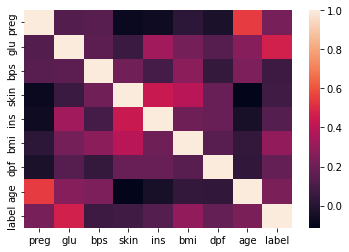

In [9]:
sns.heatmap(df.corr())
plt.show()

<h2>Normalization</h2>

In [10]:
teste = df.iloc[:,:]

teste

,preg,glu,bps,skin,ins,bmi,dpf,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
X = df.iloc[:,:-1] # compute dataset less the last number

X.head(3)

,preg,glu,bps,skin,ins,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


In [12]:
y = df.iloc[:,-1:]

y.head(2)

,label
0,1
1,0


In [13]:
from sklearn import preprocessing

mms = preprocessing.MinMaxScaler(feature_range=(0,1))

X_scaled = mms.fit_transform(X)

X_scaled

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=16)

In [15]:
model = LogisticRegression(random_state=16)

model

LogisticRegression(random_state=16)

In [16]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1])

In [17]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[118,   7],
       [ 28,  39]])

In [18]:
target_names = ['without diabetes', 'with diabetes']

print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.81      0.94      0.87       125
   with diabetes       0.85      0.58      0.69        67

        accuracy                           0.82       192
       macro avg       0.83      0.76      0.78       192
    weighted avg       0.82      0.82      0.81       192



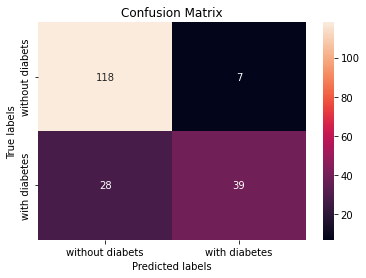

In [19]:
ax = plt.subplot()

sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['without diabets','with diabetes'])
ax.yaxis.set_ticklabels(['without diabets','with diabetes'])

plt.show()

In [20]:
y_pred.shape, y_test.shape

((192,), (192, 1))

In [21]:
y_pred_proba = model.predict_proba(X_test)

y_pred_proba.shape

(192, 2)

In [22]:
y_pred_proba = model.predict_proba(X_test)[:,1]

y_pred_proba.shape

(192,)

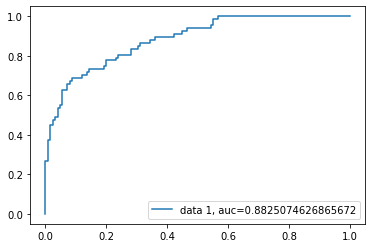

In [23]:
# y_pred_proba = model.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()